In [2]:
import matplotlib.pyplot as plt
import json, numpy as np
from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

data_kmp2 = None
with open('../data/diamond-dzvp-kmp2.json', 'r') as f:
    data_kmp2 = json.load(f)

data_klno = None
with open('../data/diamond-dzvp-klno.json', 'r') as f:
    data_klno = json.load(f)


In [3]:
for k, v in data_kmp2.items():
    print(k, v)
    break

for k, v in data_klno.items():
    print(k, v)
    break

../benchmark/diamond/kmp2/3-4-4/gth-dzvp/fftdf/50 {'method': 'fftdf-50', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 9826.0, 'nkpt': 48.0, 'kmesh': '[3, 4, 4]', 'ene_krhf': -11.03590156, 'ene_kmp2': -11.29847576, 'ene_corr_kmp2': -0.2625742, 'time_build_df': 0.01, 'time_get_vk': 20.9, 'time_kmp2': 2322.93}
../benchmark/diamond/klno/3-4-4/gth-dzvp/fftisdf/50/20/3e-6 {'method': 'fftisdf-50-20', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 520.0, 'nkpt': 48.0, 'kmesh': '[3, 4, 4]', 'ene_krhf': -11.03593093, 'ene_klno_mp2': -11.03875709, 'ene_klno_ccsd': -11.03925261, 'ene_corr_klno_mp2': -0.00282616, 'ene_corr_klno_ccsd': -0.00332168, 'time_build_df': 24.82, 'time_get_vk': 0.42, 'time_klno': 97.56}


-0.23498797 -0.00459208 [-0.01720487, -0.00459208, -0.01585391, -0.01207656, -0.01907509] -0.23498797
1.1582585629956847 -0.0008422707273807538


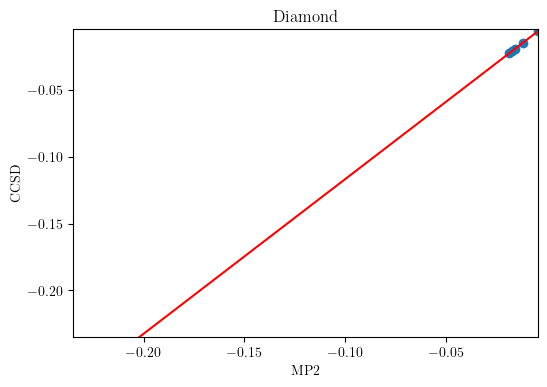

In [18]:
kmesh = "[2, 2, 2]"
basis = "gth-dzvp"
method = ["rsdf-2.0", "fftisdf-100-10"]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

x = []
y = []
for k, v in data_klno.items():
    is_match = True
    is_match = is_match and (v['kmesh'] == kmesh)
    is_match = is_match and (v['basis'] == basis)
    is_match = is_match and (v['method'] == method[0])

    if is_match:
        x.append(v['ene_corr_klno_mp2'])
        y.append(v['ene_corr_klno_ccsd'])

x0 = None
for k, v in data_kmp2.items():
    is_match = True
    is_match = is_match and (v['kmesh'] == kmesh)
    is_match = is_match and (v['basis'] == basis)
    is_match = is_match and (v['method'] == method[1])

    if is_match:
        x0 = v['ene_corr_kmp2']

a, b = np.polyfit(x, y, 1)
ax.scatter(x, y)

xmin = min(x0, min(x))
xmax = max(x0, max(x))
print(xmin, xmax, x, x0)
xx = np.linspace(xmin, xmax, 100)   
ax.plot(xx, a*xx + b, color='red')
print(a, b)
ax.set_xlabel('MP2')
ax.set_ylabel('CCSD')
ax.set_title('Diamond')
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)

fig.savefig(figpath / 'diamond-kmp2-klno.png', dpi=300)
plt.show()
        


0.9562283221701516 -11.068592848050075 0.9960765617851411 1.505433716136721e-07 0.03468288876363903
1.045392466992068 -11.3261082963541 0.9986812891234457 5.727421460855919e-09 0.021939331756667523


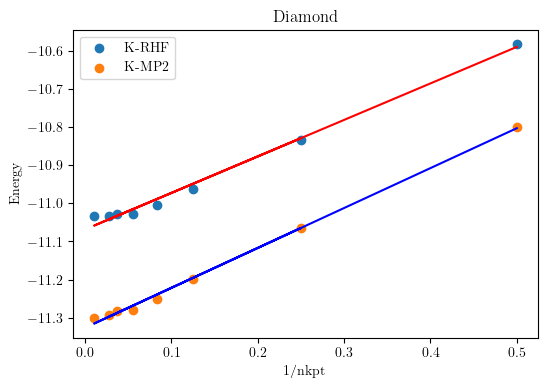

In [40]:
basis = "gth-dzvp"
method = "rsdf-2.0"

kmesh = []
for k, v in data_kmp2.items():
    kmesh.append(v['kmesh'])
kmesh = list(set(kmesh))

# x stands for nkpt, y1 stands for ene_krhf, y2 stands for ene_kmp2
x = []
y1 = []
y2 = []
for k, v in data_kmp2.items():
    is_match = True
    # is_match = is_match and (v['kmesh'] == kmesh)
    is_match = is_match and (v['basis'] == basis)
    is_match = is_match and (v['method'] == method)

    if is_match:
        x.append(v['nkpt'])
        y1.append(v['ene_krhf'])
        y2.append(v['ene_kmp2'])

nn = 2
xx = 1.0 / np.array(x)[nn:] 
yy1 = np.array(y1)[nn:]
yy2 = np.array(y2)[nn:]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

from scipy.stats import linregress
res = linregress(xx, yy1)
slope, intcp, rv, pv, stderr = res[:]
print(slope, intcp, rv, pv, stderr)
ax.plot(xx, slope*xx + intcp, color='red')
ax.scatter(xx, yy1, label='K-RHF')
slope, intcp, rv, pv, stderr = linregress(xx, yy2)
print(slope, intcp, rv, pv, stderr)
ax.plot(xx, slope*xx + intcp, color='blue')
ax.scatter(xx, yy2, label='K-MP2')

ax.set_xlabel('1/nkpt')
ax.set_ylabel('Energy')
ax.set_title('Diamond')
ax.legend()
plt.show()